In [1]:

import re
import pandas as pd
import numpy as np
from collections import defaultdict
from nltk import tokenize


from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange


import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re


pd.set_option('display.max_rows', 500)


In [2]:
def getcorpus_local(local):
    with open(str(local)+'.txt') as f:
        soup = BeautifulSoup(f, "html.parser")
        words = soup.get_text()
        #words= re.sub("[^a-zA-Z' ]+", " ", words)
        words = re.sub("\\n","",words)
        words =re.sub("\\'", "", words)
        return words
    
    
HPOne = getcorpus_local("Harry Potter and the Sorcerer")

In [3]:
chapternumbers = re.findall(r"(?<=CHAPTER )(\w+)", HPOne)
chapternumbers

['ONE',
 'TWO',
 'THREE',
 'FOUR',
 'FIVE',
 'SIX',
 'SEVEN',
 'EIGHT',
 'NINE',
 'TEN',
 'ELEVEN',
 'TWELVE',
 'THIRTEEN',
 'FOURTEEN',
 'FIFTEEN',
 'SIXTEEN',
 'SEVENTEEN']

In [96]:
chapternames =     ["The Boy Who Lived",  
"The Vanishing Glass",   
"The Letters from No One", 
"The Keeper of Keys",   
"Diagon Alley",       
"The Journey from Platform Nine and Three-Quarters",     
"The Sorting Hat",   
"The Potions Master",      
"The Midnight Duel",  
"Hallowe'en", 
"Quidditch",    
"The Mirror of Erised",     
"Nicholas Flamel", 
"Norbert the Norwegian Ridgeback",     
"The Forbidden Forest",   
"Through the Trapdoor",     
"The Man with Two Faces"]
chapternames

['The Boy Who Lived',
 'The Vanishing Glass',
 'The Letters from No One',
 'The Keeper of Keys',
 'Diagon Alley',
 'The Journey from Platform Nine and Three-Quarters',
 'The Sorting Hat',
 'The Potions Master',
 'The Midnight Duel',
 "Hallowe'en",
 'Quidditch',
 'The Mirror of Erised',
 'Nicholas Flamel',
 'Norbert the Norwegian Ridgeback',
 'The Forbidden Forest',
 'Through the Trapdoor',
 'The Man with Two Faces']

In [5]:
chaptertext = HPOne.split("CHAPTER")


chaptertextformatted = []
for num in list(range(len(chapternames))):
    intext =chaptertext[num+1][1:len(chapternumbers[num] + str("  ")+ chapternames[num].rstrip())+1]
    #print(intext)
    chaptertextformatted.append(chaptertext[num+1].split(intext)[1])

In [6]:
def listOfTuples(l1, l2): 
    return list(map(lambda x, y:(x,y), l1, l2))


namestuple = listOfTuples(chapternames, chaptertextformatted)



chapternamelistformatted = []
for num  in list(range(len(chapternames))):
    chapternamelistformatted.append( 'CHAPTER '+ chapternumbers[num])
    
    
    
BookOne =dict(zip(chapternamelistformatted, namestuple))

In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
for chapternum in tqdm(BookOne, desc='Progress'):
    print(chapternum)
    text =BookOne[chapternum][1]
    sentence_list = tokenize.sent_tokenize(text)
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    #print(sentence_list)
    
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']

    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)
    BookOne[chapternum] = (BookOne[chapternum][0], BookOne[chapternum][1], sentiments)

CHAPTER ONE
CHAPTER TWO
CHAPTER THREE
CHAPTER FOUR
CHAPTER FIVE
CHAPTER SIX
CHAPTER SEVEN
CHAPTER EIGHT
CHAPTER NINE
CHAPTER TEN
CHAPTER ELEVEN
CHAPTER TWELVE
CHAPTER THIRTEEN
CHAPTER FOURTEEN
CHAPTER FIFTEEN
CHAPTER SIXTEEN
CHAPTER SEVENTEEN



In [9]:
compound_sentiments = [BookOne[chapter][2]['compound'] for chapter in BookOne]

In [62]:
chapter_indices = {}
idx = 0
start = idx
for chapter in BookOne:
    idx += 1
    chapter_indices [chapter] = (start, idx)


chapter_indices

{'CHAPTER ONE': (0, 1),
 'CHAPTER TWO': (0, 2),
 'CHAPTER THREE': (0, 3),
 'CHAPTER FOUR': (0, 4),
 'CHAPTER FIVE': (0, 5),
 'CHAPTER SIX': (0, 6),
 'CHAPTER SEVEN': (0, 7),
 'CHAPTER EIGHT': (0, 8),
 'CHAPTER NINE': (0, 9),
 'CHAPTER TEN': (0, 10),
 'CHAPTER ELEVEN': (0, 11),
 'CHAPTER TWELVE': (0, 12),
 'CHAPTER THIRTEEN': (0, 13),
 'CHAPTER FOURTEEN': (0, 14),
 'CHAPTER FIFTEEN': (0, 15),
 'CHAPTER SIXTEEN': (0, 16),
 'CHAPTER SEVENTEEN': (0, 17)}

In [64]:
chaplist = []
for chapter in BookOne:
    chaplist.append(chapter)

In [106]:
length = len(BookOne)
x = np.linspace(0, length, num=length)
y = [BookOne[chapter][2]['compound'] for chapter in BookOne]
colors = ['darkslateblue','navy', 'blue','darkslategrey','lightslategrey',
          'steelblue','dodgerblue', 'deepskyblue', 'darkturquoise',
        'darkcyan','cyan', 'paleturquoise', 'aquamarine', 'mediumspringgreen',
          'lime', 'limegreen',
         'darkgreen']
altcolors = ['aqua', 'coral', 'gold', 'lime', 'midnightblue', 'blueviolet',
            'orange', 'lightseagreen', 'lightcoral', 'sienna', 'olivedrab',
            'crimson', 'deepskyblue', 'wheat', 'darkgreen', 'teal', 'indigo']


test = pd.DataFrame(
    {'X': x.tolist(),
     'Y':y,
     'Color':colors,
     'Altcolors':altcolors,
     'Label':chaplist,
     'Name':chapternames
    })
test

,X,Y,Color,Altcolors,Label,Name
0,0.0000,0.032864,darkslateblue,aqua,CHAPTER ONE,The Boy Who Lived
1,1.0625,-0.023298,navy,coral,CHAPTER TWO,The Vanishing Glass
2,2.1250,-0.004306,blue,gold,CHAPTER THREE,The Letters from No One
3,3.1875,-0.030050,darkslategrey,lime,CHAPTER FOUR,The Keeper of Keys
4,4.2500,0.044657,lightslategrey,midnightblue,CHAPTER FIVE,Diagon Alley
5,5.3125,0.024965,steelblue,blueviolet,CHAPTER SIX,The Journey from Platform Nine and Three-Quarters
6,6.3750,0.044561,dodgerblue,orange,CHAPTER SEVEN,The Sorting Hat
7,7.4375,0.027778,deepskyblue,lightseagreen,CHAPTER EIGHT,The Potions Master
8,8.5000,-0.003218,darkturquoise,lightcoral,CHAPTER NINE,The Midnight Duel
9,9.5625,0.035992,darkcyan,sienna,CHAPTER TEN,Hallowe'en


In [74]:
for num in list(range(len(test)-1)):
    print(test.iloc[ [num,num+1] , [1 ]], test['Color'][num], test['Label'][num])

          Y
0  0.032864
1 -0.023298 darkslateblue CHAPTER ONE
          Y
1 -0.023298
2 -0.004306 navy CHAPTER TWO
          Y
2 -0.004306
3 -0.030050 blue CHAPTER THREE
          Y
3 -0.030050
4  0.044657 darkslategrey CHAPTER FOUR
          Y
4  0.044657
5  0.024965 lightslategrey CHAPTER FIVE
          Y
5  0.024965
6  0.044561 steelblue CHAPTER SIX
          Y
6  0.044561
7  0.027778 dodgerblue CHAPTER SEVEN
          Y
7  0.027778
8 -0.003218 deepskyblue CHAPTER EIGHT
          Y
8 -0.003218
9  0.035992 darkturquoise CHAPTER NINE
           Y
9   0.035992
10  0.000959 darkcyan CHAPTER TEN
           Y
10  0.000959
11  0.033334 cyan CHAPTER ELEVEN
           Y
11  0.033334
12  0.002008 paleturquoise CHAPTER TWELVE
           Y
12  0.002008
13  0.013164 aquamarine CHAPTER THIRTEEN
           Y
13  0.013164
14 -0.056830 mediumspringgreen CHAPTER FOURTEEN
           Y
14 -0.056830
15  0.009207 lime CHAPTER FIFTEEN
           Y
15  0.009207
16  0.012429 limegreen CHAPTER SIXTEEN


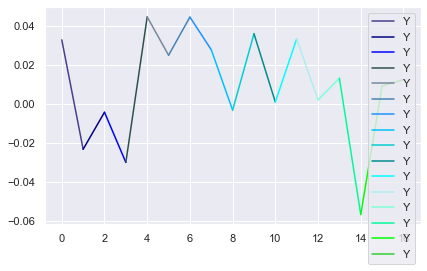

In [76]:

# Create plot
fig, ax = plt.subplots()

for num in list(range(len(test)-1)):
    test.iloc[ [num,num+1] , [1 ]].plot(ax=ax, color=test['Color'][num], label=' ')
    
    


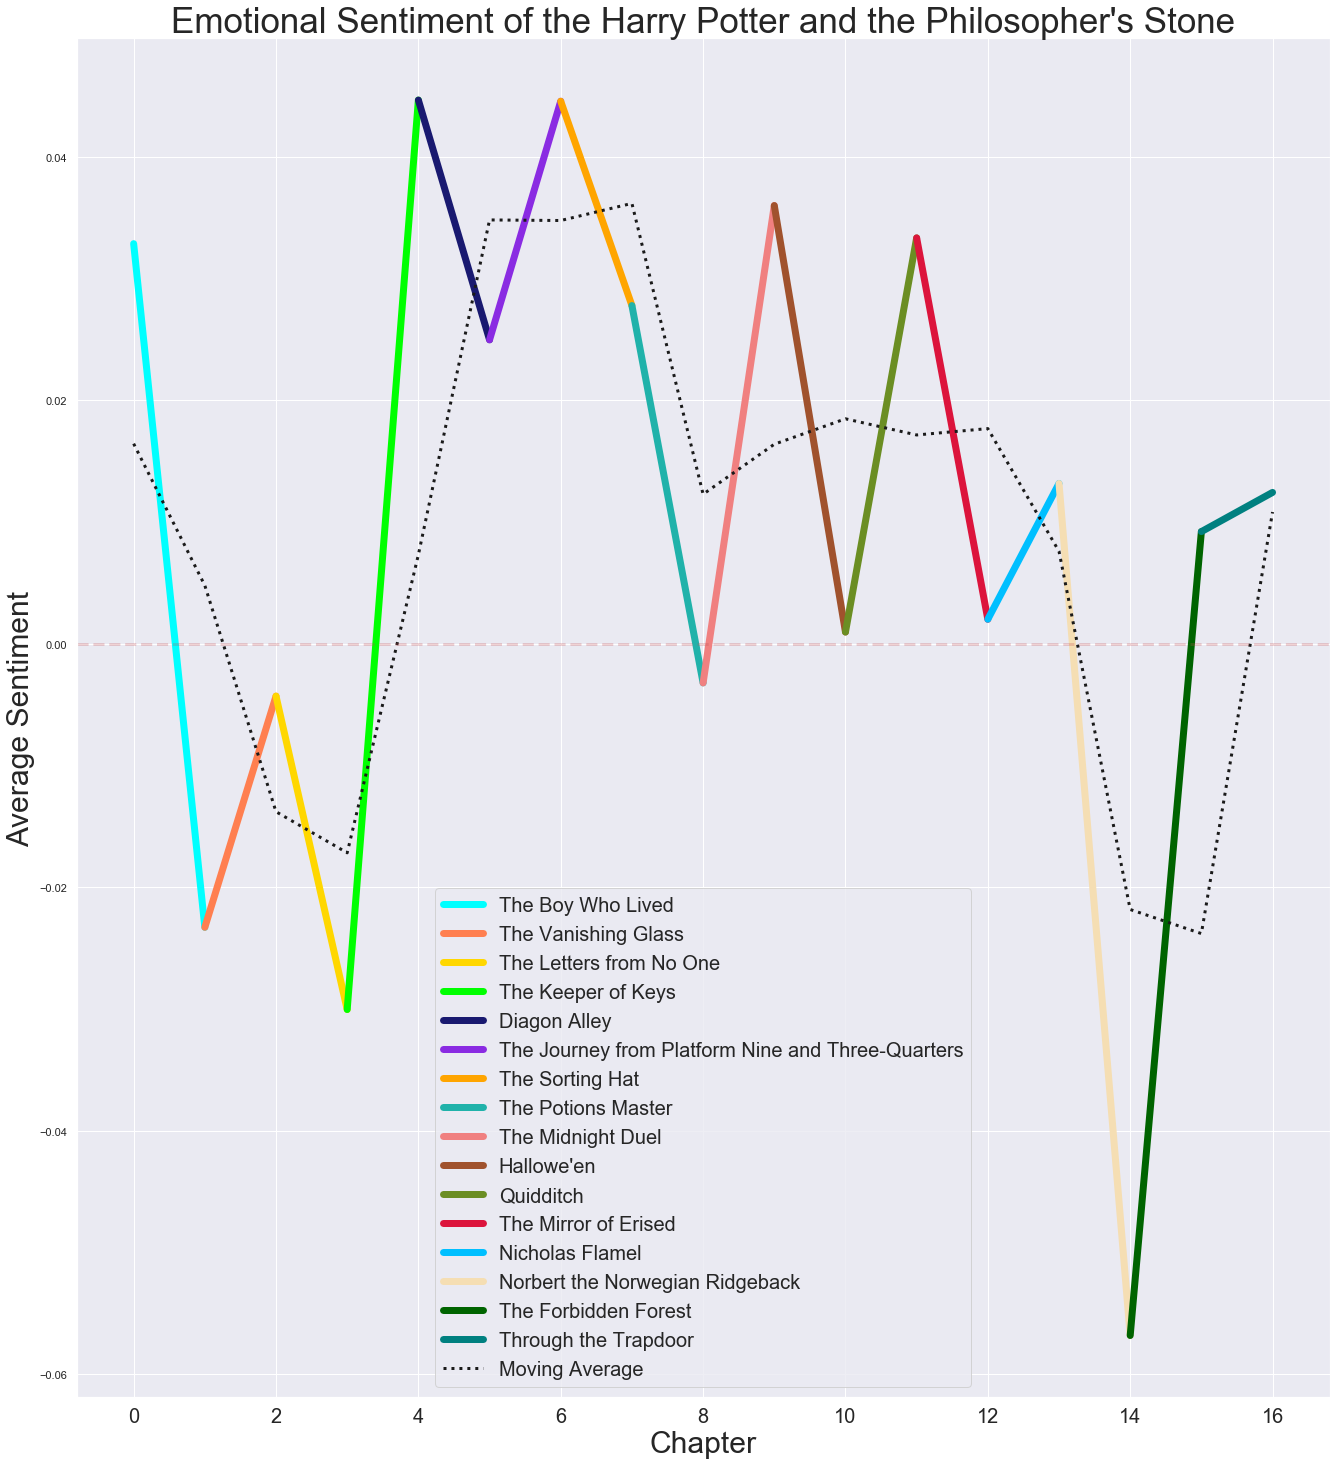

In [122]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

plt.figure(figsize=(20, 25))

for num in list(range(len(test)-1)):
    plt.plot( test.iloc[ [num,num+1] , [1 ]],color=test['Altcolors'][num],
             label=chapternames[num], linewidth=7 )
    
plt.plot(movingaverage(y, 2), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend( fontsize=20)
plt.title("Emotional Sentiment of the Harry Potter and the Philosopher's Stone", fontsize=35)
plt.xlabel('Chapter', fontsize=30)
plt.ylabel('Average Sentiment', fontsize=30)
plt.xticks(fontsize=20)
plt.show()

In [131]:
from matplotlib.pyplot import cm

plt.figure(figsize=(20, 25))
color=iter(cm.rainbow(np.linspace(0,1,n)))


for num in list(range(len(test)-1)):
    plt.plot( test.iloc[ [num,num+1] , [1 ]],c=color,
             label=chapternames[num], linewidth=7 )
    
plt.plot(movingaverage(y, 2), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend( fontsize=20)
plt.title("Emotional Sentiment of the Harry Potter and the Philosopher's Stone", fontsize=35)
plt.xlabel('Chapter', fontsize=30)
plt.ylabel('Average Sentiment', fontsize=30)
plt.xticks(fontsize=20)
plt.show()

ValueError: Invalid RGBA argument: <iterator object at 0x000000D7009CBB48>

<Figure size 1440x1800 with 1 Axes>

In [125]:
cmap="BuPu"

In [126]:
cmap

'BuPu'